#### Importing necessary packages:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('ggplot')
from pandas.api.types import CategoricalDtype
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### Reading CSV file and managing nonrelevant/reordering columns:

In [23]:
df = pd.read_csv(r'rideshare_kaggle.csv')

In [28]:
# Dropping non relevant columns
df = df.drop(['timezone', 'apparentTemperature', 'long_summary', 'humidity', 'windGustTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'sunriseTime', 'sunsetTime', 'temperatureMin', 'temperatureMax', 'timestamp'], axis = 1)

KeyError: "['timezone' 'apparentTemperature' 'long_summary' 'humidity' 'windGustTime'\n 'temperatureHighTime' 'temperatureLowTime' 'apparentTemperatureHigh'\n 'apparentTemperatureHighTime' 'apparentTemperatureLow'\n 'apparentTemperatureLowTime' 'icon' 'dewPoint' 'pressure' 'windBearing'\n 'visibility.1' 'ozone' 'moonPhase' 'precipIntensityMax' 'uvIndexTime'\n 'temperatureMinTime' 'temperatureMaxTime' 'apparentTemperatureMin'\n 'apparentTemperatureMinTime' 'apparentTemperatureMax'\n 'apparentTemperatureMaxTime' 'sunriseTime' 'sunsetTime' 'temperatureMin'\n 'temperatureMax' 'timestamp'] not found in axis"

In [30]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex'],
      dtype='object')

In [31]:
# Reordering columns
df = df[['id', 'hour', 'day', 'month', 'datetime', 'week day', 'time of day', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'price_per', 'price_per_surge_adjusted', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'cloudCover', 'uvIndex']]

KeyError: "['price_per', 'week day', 'time of day', 'price_per_surge_adjusted'] not in index"

In [32]:
# Converting datetime col to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
693066   2018-12-01 23:53:05
693067   2018-12-01 23:53:05
693068   2018-12-01 23:53:05
693069   2018-12-01 23:53:05
693070   2018-12-01 23:53:05
Name: datetime, Length: 693071, dtype: datetime64[ns]

In [34]:
# Creating a new column - weekday
df['weekday'] = df['datetime'].apply(lambda x: x.day_name())
df['weekday']

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
693066     Saturday
693067     Saturday
693068     Saturday
693069     Saturday
693070     Saturday
Name: weekday, Length: 693071, dtype: object

In [35]:
# Creating new column 'time of day' from hour column outlining the various times of day
df['time of day'] = df['hour'].apply(lambda row: 'Morning' if row >= 5 and row <9 else 'Mid Morning' if row >= 9 and row <13 else 'Afternoon' if row >= 13 and row <17 else 'Evening' if row >=17 and row <21 else 'Night' if (row >=21 and row<=23) or (row >=0 and row<=1) else "Late Night")

In [36]:
# Creating new column - price per distance ($/mile)
df['price_per'] = df['price']/df['distance']

In [37]:
# Surge multiplier adjustment necessary ?
df['price_per_surge_adjusted)'] = df['price_per']/df['surge_multiplier']
df[['price_per_surge_adjusted)']]

,price_per_surge_adjusted)
0,11.363636
1,25.000000
2,15.909091
3,59.090909
4,20.454545
...,...
693066,13.000000
693067,9.500000
693068,NaN
693069,27.000000


In [41]:
# Initializing Uber only data table
df_uber = df[df['cab_type']=='Uber']

In [42]:
# Initializing Lyft only data table
df_lyft = df[df['cab_type']=='Lyft']

In [43]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex', 'weekday', 'time of day', 'price_per',
       'price_per_surge_adjusted)'],
      dtype='object')

In [44]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,windGust,visibility,temperatureHigh,temperatureLow,cloudCover,uvIndex,weekday,time of day,price_per,price_per_surge_adjusted)
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,9.17,10.000,43.68,34.19,0.72,0,Sunday,Mid Morning,11.363636,11.363636
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,11.98,4.786,47.30,42.10,1.00,0,Tuesday,Late Night,25.000000,25.000000
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,7.33,10.000,47.55,33.10,0.03,0,Wednesday,Night,15.909091,15.909091
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,5.28,10.000,45.03,28.90,0.00,0,Friday,Late Night,59.090909,59.090909
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,9.14,10.000,42.18,36.71,0.44,0,Thursday,Late Night,20.454545,20.454545


#### Cleaning data - finding null values and deleting them:

In [45]:
df.isnull().any(axis=0)

id                           False
hour                         False
day                          False
month                        False
datetime                     False
source                       False
destination                  False
cab_type                     False
product_id                   False
name                         False
price                         True
distance                     False
surge_multiplier             False
latitude                     False
longitude                    False
temperature                  False
short_summary                False
precipIntensity              False
precipProbability            False
windSpeed                    False
windGust                     False
visibility                   False
temperatureHigh              False
temperatureLow               False
cloudCover                   False
uvIndex                      False
weekday                      False
time of day                  False
price_per           

In [46]:
df['price'].isnull().value_counts()

False    637976
True      55095
Name: price, dtype: int64

In [47]:
# Drop all rows with null values (have sufficient data points)
df = df.dropna(axis=0, how = 'any')

#### DataFrame logistics:

In [48]:
# Highlights the time span of all the data points collected (~23 days)
fst = df['datetime'].min()
lst = df['datetime'].max()
print(fst)
print(lst)
lst-fst

2018-11-26 03:40:46
2018-12-18 19:15:10


Timedelta('22 days 15:34:24')

# Analysis

/Users/benburkey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance', ylabel='price'>

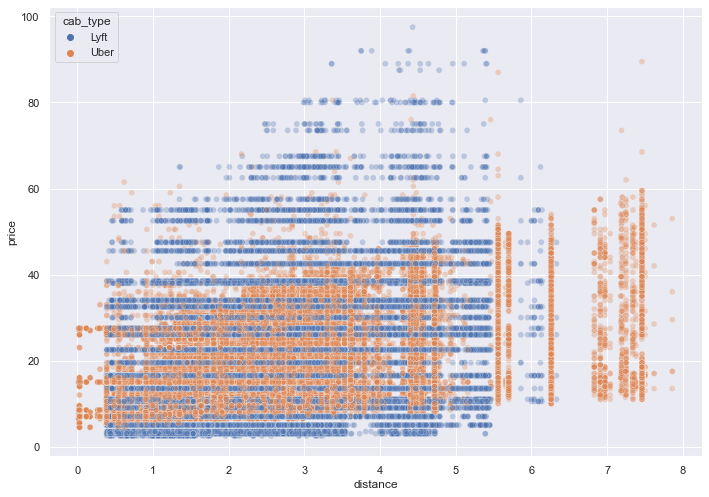

In [77]:
# General plot of price vs. distance w/ a hue for cab_type
time_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
sns.scatterplot(df['distance'], df['price'], hue=df['cab_type'], alpha=0.3)

In [50]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'cloudCover', 'uvIndex', 'weekday', 'time of day', 'price_per',
       'price_per_surge_adjusted)'],
      dtype='object')

In [51]:
df['cloudCover'].unique()

array([0.72, 1.  , 0.03, 0.  , 0.44, 0.12, 0.64, 0.91, 0.53, 0.06, 0.81,
       0.77, 0.02, 0.92, 0.34, 0.39, 0.86, 0.37, 0.3 , 0.48, 0.23, 0.99,
       0.46, 0.35, 0.2 , 0.87, 0.82, 0.98, 0.74, 0.13, 0.41, 0.76, 0.89,
       0.22, 0.78, 0.25, 0.08, 0.56, 0.95, 0.52, 0.75, 0.01, 0.33, 0.04,
       0.67, 0.66, 0.14, 0.31, 0.54, 0.93, 0.97, 0.17, 0.69, 0.55, 0.83,
       0.4 , 0.6 , 0.96, 0.8 , 0.49, 0.21, 0.68, 0.09, 0.94, 0.32, 0.71,
       0.59, 0.16, 0.28, 0.58, 0.29, 0.51, 0.43, 0.27, 0.19, 0.24, 0.79,
       0.61, 0.1 , 0.05, 0.73, 0.42, 0.47])

In [ ]:
## numeric_val = df['price', 'distance', 'surge multiplier', 'price_per', 'price_per_surge_adjusted', 'temperature', 'precipProbability', ]

## Analysis of time/date:

In [52]:
# dict to sort values by days of the week
week_days_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Satuday':5, 'Sunday':6}

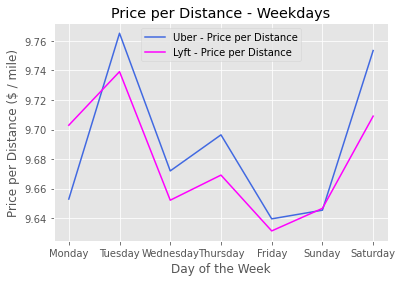

In [65]:
# Line plot of the weekday groupy of both Uber and Lyft's price per distance
df.groupby(['weekday', 'cab_type']).agg({'price_per': 'mean'})
weekday_price_uber = df_uber.groupby('weekday').agg({'price_per': 'mean'})
weekday_price_lyft = df_lyft.groupby('weekday').agg({'price_per': 'mean'})
df_weekday_price_both = pd.merge(weekday_price_uber, weekday_price_lyft, on='weekday').sort_values(by=['weekday'], key=lambda x:x.map(week_days_dict))
df_weekday_price_both.columns = ['Uber - Price per Distance', 'Lyft - Price per Distance']
df_weekday_price_both.plot(title='Price per Distance - Weekdays', xlabel='Day of the Week', ylabel='Price per Distance ($ / mile)', color=['royalblue', 'magenta'])
plt.legend(loc = 'upper center')

In [54]:
# Total count of rides per hour, avg. surge multiplier each hour, avg. distance per hour, avg. price per distance per hour
time_of_day = df.groupby(['hour']).agg({'id':'size', 'surge_multiplier':'mean', 'distance':'mean', 'price_per':'mean'})
time_of_day

,id,surge_multiplier,distance,price_per
hour,,,,
0,29872,1.015449,2.186149,9.726170
1,26310,1.015317,2.180502,9.663340
2,26323,1.015652,2.192988,9.688609
3,25530,1.014835,2.188440,9.635379
4,26125,1.014526,2.178671,9.628231
5,22995,1.014873,2.179677,9.889194
6,25147,1.014515,2.189237,9.810561
7,22930,1.013945,2.174980,9.550098
8,22337,1.014908,2.199121,9.699164


<AxesSubplot:title={'center':'Price per Distance - Time of Day'}, xlabel='Time of day', ylabel='Price per Distance ($ / mile)'>

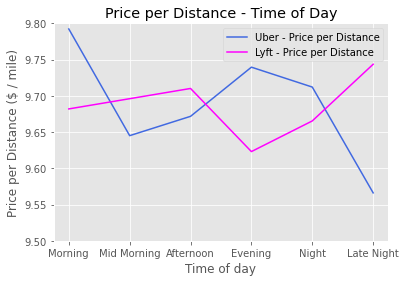

In [70]:
order_dict = {'Morning':0, 'Mid Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late Night':5}

time_of_day_uber = df_uber.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_lyft = df_lyft.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_both = pd.merge(time_of_day_uber, time_of_day_lyft, on='time of day').sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_both.columns=['Uber - Price per Distance', 'Lyft - Price per Distance']
time_of_day_both.plot(kind='line', title='Price per Distance - Time of Day', ylim=(9.5,9.8), xlabel='Time of day', ylabel='Price per Distance ($ / mile)', color=['royalblue', 'magenta'])

In [71]:
time_of_day_uber = df_uber.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_uber

,price_per
time of day,
Morning,9.792259
Mid Morning,9.645065
Afternoon,9.671725
Evening,9.739554
Night,9.712099
Late Night,9.566126


<AxesSubplot:title={'center':'Hourly Price per Distance'}, xlabel='Hour of the day', ylabel='Price per Distance ($ / mile)'>

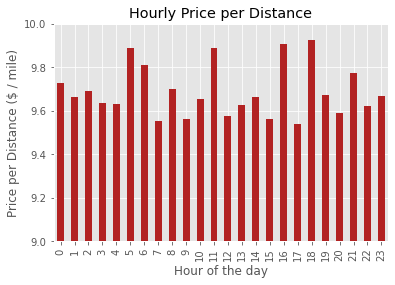

In [72]:
hour_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
hour_of_day.plot(kind='bar', ylim=(9,10), title='Hourly Price per Distance', xlabel='Hour of the day', ylabel='Price per Distance ($ / mile)', legend=False, color='firebrick')


## Analysis of pick-up /drop-off locations:

In [ ]:
# Groupby of cab_type - source - destination for multiple ride metrics (surge_multiplier, price, distance, price_per)
loc_source_dest_tot = df.groupby(['cab_type', 'source', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
pd.options.display.max_rows = 150
loc_source_dest_tot

In [ ]:
# Subset of the table above - only including source (destination not included)
loc_source_tot = df.groupby(['cab_type', 'source']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_source_tot

In [ ]:
# Subset of the table above - only including destination (source not included)
loc_dest_tot = df.groupby(['cab_type', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_dest_tot

In [ ]:
# Uber-source data
df_uber_source = df_uber.groupby('source').mean()[['price_per']].sort_values(by='source')
df_uber_source

In [ ]:
df_uber_source.plot(kind='bar', color='royalblue')

In [ ]:
# Lyft-source data
df_lyft_source = df_lyft.groupby('source').mean()[['price_per']].sort_values(by='source')
df_lyft_source

In [ ]:
df_lyft_source.plot(kind='bar', color='purple')

In [ ]:
# Merged source tables from both Lyft and Uber for plotting purposes
df_source_both = pd.merge(df_uber_source, df_lyft_source, on='source')
df_source_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_source_both

In [ ]:
# Plot of Uber and Lyft prices per distance based on SOURCE (pick-up location)
df_source_both.plot(kind='bar', color=['dodgerblue', 'purple'], title = 'Uber vs. Lyft: Price per Distance - By Source', xlabel = 'Pick-up Location', ylabel = 'Price per Distance ($ / mile)')
df_source_both.ylabel = 'Price per Distance (miles)'

In [ ]:
# Plot of Uber and Lyft prices per distance based on DESTINATION (drop-off location)
df_uber_dest = df_uber.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_lyft_dest = df_lyft.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_dest_both = pd.merge(df_uber_dest, df_lyft_dest, on='destination')
df_dest_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_dest_both.plot(kind='bar', color=['dodgerblue', 'purple'], title = 'Uber vs. Lyft: Price per Distance - By Destination', xlabel = 'Drop-off Location', ylabel = 'Price per Distance ($ / mile)')

In [ ]:
from urllib.request import urlopen
import json

with urlopen('https://raw.githubusercontent.com/dj/boston/master/data/boston-neighborhoods.json') as response:
    neighborhoods = json.load(response)

import plotly.express as px

fig = px.choropleth(df, geojson=neighborhoods, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# Lyft-Source dataset to be plotted on geographic heatmap
df_lyft_source_plot = df_lyft.groupby(by='source').mean()[['price_per']].sort_values(by='source')
source_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_lyft_source_plot['source'] = source_lst
df_lyft_source_plot.index = range(12)
df_lyft_source_plot


In [ ]:
# Uber-Source dataset to be plotted on geographic heatmap
df_uber_source_plot = df_uber.groupby(by='source').mean()[['price_per']].sort_values(by='source')
source_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_uber_source_plot['source'] = source_lst
df_uber_source_plot.index = range(12)
df_uber_source_plot

In [ ]:
# Uber-Destination dataset to be plotted on geographic heatmap
df_uber_dest_plot = df_uber.groupby(by='destination').mean()[['price_per']].sort_values(by='destination')
dest_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_uber_dest_plot['destination'] = dest_lst
df_uber_dest_plot.index = range(12)
df_uber_dest_plot

In [ ]:
tup = list(zip(df['latitude'], df['longitude']))
tup_to_lst = [list(ele) for ele in tup]
df['long_lat'] = tup_to_lst
df['long_lat'].astype(str).unique()

In [ ]:
df.loc[df['source']=='Haymarket Square', :]['longitude']

In [ ]:
df.loc[df['source']=='Haymarket Square', :]['latitude']

In [ ]:
df.loc[df['destination']=='Haymarket Square', :][['latitude', 'longitude']]

In [ ]:
df.loc[df['destination']=='Haymarket Square', :]['longitude']

In [ ]:
print(df['distance'].max())
print(df['distance'].min())

In [ ]:
df.groupby('cab_type').agg({'price_per': 'mean','price_per_surge_adjusted': 'mean'})

In [ ]:
df

In [ ]:
# Lyft-Destination dataset to be plotted on geographic heatmap
df_lyft_dest_plot = df_lyft.groupby(by='destination').mean()[['price_per']].sort_values(by='destination')
dest_lst = ['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway', 'Financial District', 'Haymarket Square', 'North End', 'North Station', 'Northeastern University', 'South Station', 'Theatre District', 'West End']
df_lyft_dest_plot['destination'] = source_lst
df_lyft_dest_plot.index = range(12)
df_lyft_dest_plot

In [ ]:
df

In [ ]:
long_lat_dict = {'Back Bay':[-71.081321, 42.351161], 'Beacon Hill':[-71.067274, 42.359170], 'Boston University':[-71.105131, 42.350198], 'Fenway':[-71.098505, 42.341953], 'Financial District':[-71.054488, 42.356806], 'Haymarket Square': [-71.0585457994822, 42.363916861671115], 'North End':[-71.054630, 42.365801], 'North Station':[-71.06170681508357,42.36619784699363], 'Northeastern University':[-71.08927013807684, 42.3400819338889], 'South Station':[-71.05507030159285, 42.352080255564914], 'Theatre District': [-71.064075, 42.352100], 'West End':[-71.065078, 42.364365]}


In [ ]:
df["B"] = df["A"].map(equiv)

In [ ]:
df['long_lat_source'] = df['source'].map(long_lat_dict)

In [ ]:
df['long_lat_destination'] = df[''].map(long_lat_dict)

In [ ]:
df['source'].unique()

In [ ]:
df['destination'].unique()